#### Loading the dataset from GitHub using pandas.
* Imports the pandas library: 
    * This is essential for data manipulation and analysis in Python.
* Defines the URL: 
    * This is the link to the raw dataset hosted on GitHub.
* Loads the dataset: 
    * The pd.read_csv(url) function reads the CSV file from the provided URL and loads it into a pandas DataFrame called data.

In [49]:
import pandas as pd

# URL of the raw dataset on GitHub
url = 'https://github.com/metmuseum/openaccess/raw/refs/heads/master/MetObjects.csv'

# Load the dataset
data = pd.read_csv(url)

/var/folders/pc/kvcfgc5j72b6l53r97nqwgvh0000gn/T/ipykernel_48769/3814981754.py:7: DtypeWarning: Columns (5,7,10,11,12,13,14,34,35,36,37,38,39,40,41,42,43,44,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url)


#### Analyze missing data in the DataFrame and combine it with the data types of each feature.
1. Calculate Missing Data:
* nullCounts = data.isnull().sum(): Counts the number of missing values for each feature.
* totalInstances = len(data): Gets the total number of instances in the DataFrame.
* nullPercentages = (nullCounts / totalInstances) * 100: Calculates the percentage of missing values for each feature.
2. Create a List of Tuples:
* A loop iterates over the features, counts, and percentages, appending them to nullData as tuples.
3. Create a DataFrame for Missing Data:
* nullDataFrame = pd.DataFrame(nullData, columns=['Feature', 'Count', 'Percentage']): Converts the list of tuples into a DataFrame.
* nullDataFrame = nullDataFrame.sort_values(by='Percentage', ascending=False): Sorts the DataFrame by the percentage of missing values in descending order.
4. Get Data Types:
* data_types = data.dtypes: Gets the data types of each feature.
* data_types_df = data_types.reset_index(): Converts the Series to a DataFrame.
* data_types_df.columns = ['Feature', 'Data Type']: Renames the columns for readability.
5. Merge DataFrames:
* combined_df = pd.merge(nullDataFrame, data_types_df, on='Feature'): Merges the missing data DataFrame with the data types DataFrame on the 'Feature' column.
* Finally, combined_df will contain the features, their missing value counts, percentages, and data types.

In [50]:
nullData = []
nullCounts = data.isnull().sum()
totalInstances = len(data)
nullPercentages = (nullCounts / totalInstances) * 100

for feature, count, percentage in zip(nullCounts.index, nullCounts, nullPercentages):
    nullData.append((feature, count, round(percentage, 2)))

nullDataFrame = pd.DataFrame(nullData, columns=['Feature', 'Count', 'Percentage'])

# Sort the DataFrame by 'Percentage' in decending order
nullDataFrame = nullDataFrame.sort_values(by='Percentage', ascending=False)

# Get the data types of each feature in the DataFrame
data_types = data.dtypes

# Convert the data types to a DataFrame for better readability
data_types_df = data_types.reset_index()
data_types_df.columns = ['Feature', 'Data Type']

# Merge the null data and data types into a single DataFrame
combined_df = pd.merge(nullDataFrame, data_types_df, on='Feature')

combined_df

,Feature,Count,Percentage,Data Type
0,Metadata Date,484956,100.00,float64
1,River,482864,99.57,object
2,State,482335,99.46,object
3,Locus,477438,98.45,object
4,County,476397,98.24,object
5,Reign,473720,97.68,object
6,Locale,469217,96.75,object
7,Excavation,468385,96.58,object
8,Subregion,462813,95.43,object
9,Dynasty,461755,95.22,object


#### Code set up to keep only the features relevant for analyzing accession and object dates.
1. Define Features to Keep:
* features_to_keep = ['AccessionYear', 'Object Begin Date', 'Object End Date', 'Department', 'Artist Begin Date', 'Artist End Date', 'Dimensions','Object Date']: 
    * Specifies the columns you want to retain for your analysis.
2. Drop Irrelevant Features:
* cleaned_data = data[features_to_keep]: 
    * Creates a new DataFrame cleaned_data that includes only the specified columns.
3. Convert 'AccessionYear' to Numeric:
* cleaned_data.loc[:, 'AccessionYear'] = pd.to_numeric(cleaned_data['AccessionYear'], errors='coerce'): 
    * Converts the 'AccessionYear' column to numeric, coercing any errors to NaN.
4. Drop Rows with NaN Values in 'AccessionYear':
* cleaned_data = cleaned_data.dropna(subset=['AccessionYear']): 
    * Drops rows where 'AccessionYear' is NaN.
5. Display the First Few Rows:
* .head(): 
    * Displays the first five rows of the cleaned_data DataFrame.

In [51]:
# List of features to keep for analysis of accession and object dates
features_to_keep = ['AccessionYear', 'Object Begin Date', 'Object End Date', 'Department', 'Artist Begin Date', 'Artist End Date', 'Dimensions','Object Date']

# Drop irrelevant features
cleaned_data = data[features_to_keep]

# Convert 'AccessionYear' to numeric, coercing errors to NaN
cleaned_data.loc[:, 'AccessionYear'] = pd.to_numeric(cleaned_data['AccessionYear'], errors='coerce')

# Drop rows with NaN values in 'AccessionYear'
cleaned_data = cleaned_data.dropna(subset=['AccessionYear'])

cleaned_data.head()

,AccessionYear,Object Begin Date,Object End Date,Department,Artist Begin Date,Artist End Date,Dimensions,Object Date
0,1979.0,1853,1853,The American Wing,1794,1869,Dimensions unavailable,1853
1,1980.0,1901,1901,The American Wing,1785,1844,Dimensions unavailable,1901
2,1967.0,1909,1927,The American Wing,NaN,NaN,Diam. 11/16 in. (1.7 cm),1909–27
3,1967.0,1909,1927,The American Wing,NaN,NaN,Diam. 11/16 in. (1.7 cm),1909–27
4,1967.0,1909,1927,The American Wing,NaN,NaN,Diam. 11/16 in. (1.7 cm),1909–27


#### This code will:

* Extract and visualize the distribution of accession dates by department.
* Extract and visualize the distribution of object begin and end dates by department.
* Optionally, extract and integrate artist information such as artist dates and dimensions of the art objects.

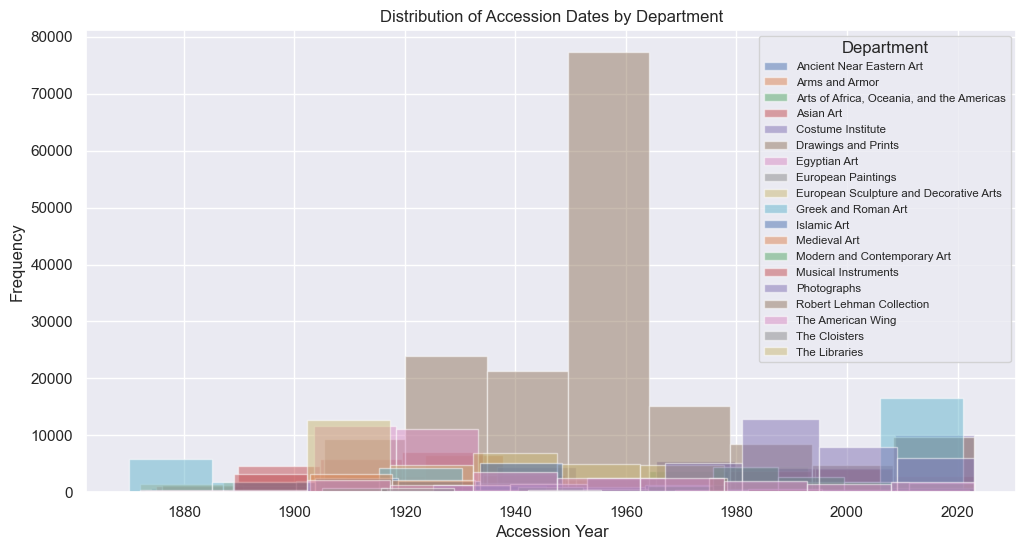

In [52]:
import matplotlib.pyplot as plt

# Plot the distribution of accession dates by department
plt.figure(figsize=(12, 6))
cleaned_data.groupby('Department')['AccessionYear'].plot(kind='hist', alpha=0.5, legend=True)
plt.title('Distribution of Accession Dates by Department')
plt.xlabel('Accession Year')
plt.ylabel('Frequency')
plt.legend(title='Department', fontsize='x-small')
plt.show()

Explain graph

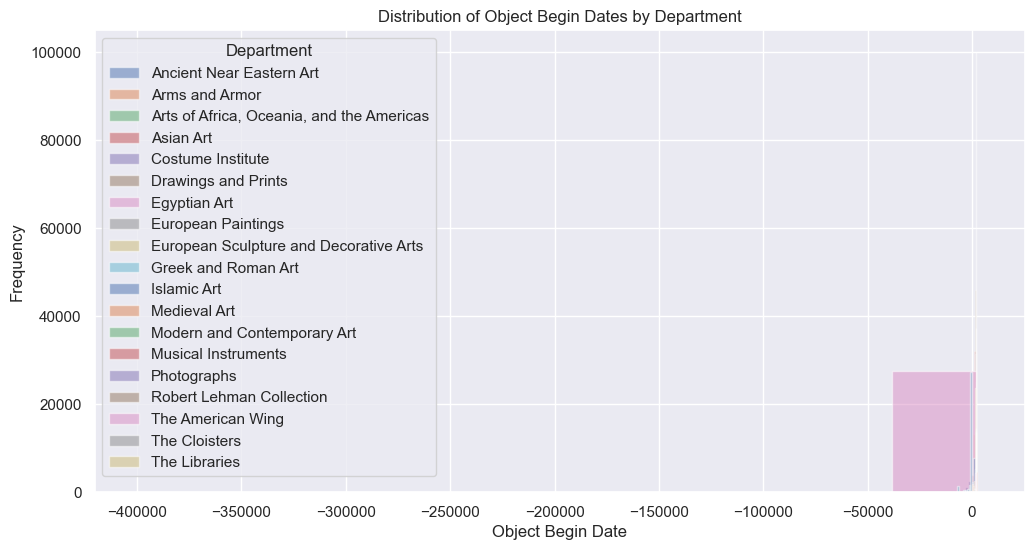

In [53]:
# Plot the distribution of object begin dates by department
plt.figure(figsize=(12, 6))
cleaned_data.groupby('Department')['Object Begin Date'].plot(kind='hist', alpha=0.5, legend=True)
plt.title('Distribution of Object Begin Dates by Department')
plt.xlabel('Object Begin Date')
plt.ylabel('Frequency')
plt.legend(title='Department')
plt.show()

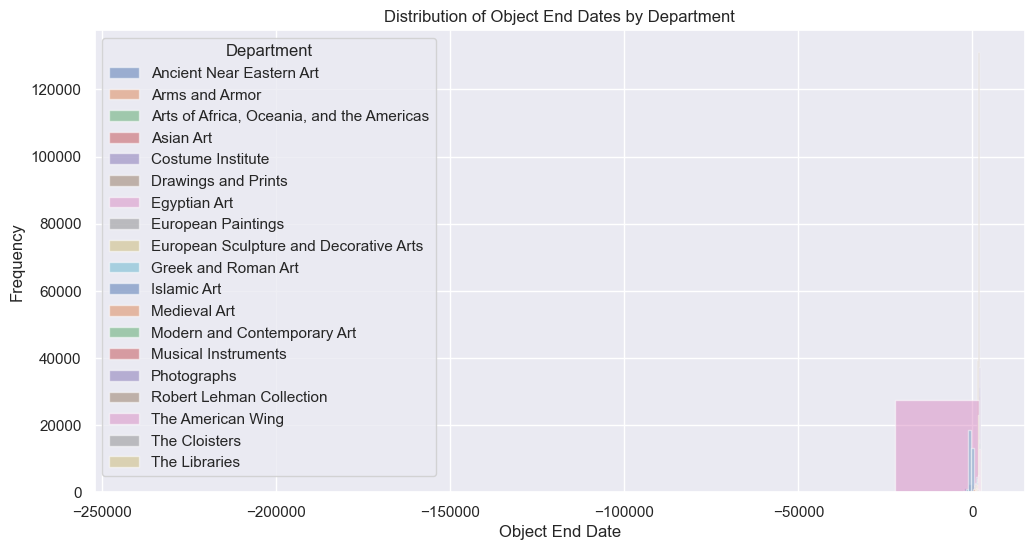

In [54]:
# Plot the distribution of object end dates by department
plt.figure(figsize=(12, 6))
cleaned_data.groupby('Department')['Object End Date'].plot(kind='hist', alpha=0.5, legend=True)
plt.title('Distribution of Object End Dates by Department')
plt.xlabel('Object End Date')
plt.ylabel('Frequency')
plt.legend(title='Department')
plt.show()

In [55]:
# Optionally: Extract and integrate artist information such as artist dates and dimensions of the art objects
artist_info = cleaned_data[['Artist Begin Date', 'Artist End Date', 'Dimensions']].dropna()
artist_info.head()

,Artist Begin Date,Artist End Date,Dimensions
0,1794,1869,Dimensions unavailable
1,1785,1844,Dimensions unavailable
9,1867,1917,Dimensions unavailable
10,1785,1844,Dimensions unavailable
11,1794,1869,Dimensions unavailable


#### Code that shows the rows that are considered anomalies, with the 'Anomaly' column indicating -1 for anomalies.
* Anomalies are data points that significantly differ from the majority of the data. In the context of your dataset, anomalies might be identified due to unusual or unexpected values in one or more features. 
    * Here are some possible reasons why certain rows were flagged as anomalies:
        * Extreme Values: 
            * Data points with values that are extremely high or low compared to the rest of the dataset. For example, an 'Object Date' far outside the typical range.

        * Inconsistent Data: 
            * Rows with inconsistent or contradictory information. For instance, an 'Object Begin Date' that is later than the 'Object End Date'.
        * Rare Combinations: 
            * Uncommon combinations of features that do not appear frequently in the dataset. For example, a specific 'Department' with unusual 'AccessionYear' values.
        * Missing or Default Values: 
            * Rows that have many missing values or default values (e.g., 0 or NaN) in features that usually contain meaningful data.
* To better understand why specific rows were flagged as anomalies, we can examine the values in these rows and compare them to the rest of the dataset. This can help identify patterns or characteristics that make these rows stand out.

In [56]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import re

# Clean 'Object Date' column by extracting the first numeric value
cleaned_data['Object Date'] = cleaned_data['Object Date'].apply(lambda x: re.findall(r'\d+', str(x))[0] if re.findall(r'\d+', str(x)) else None)

# Convert 'Object Date' to numeric, coercing errors to NaN
cleaned_data.loc[:, 'Object Date'] = pd.to_numeric(cleaned_data['Object Date'], errors='coerce')

# Drop rows with NaN values in 'Object Date'
cleaned_data = cleaned_data.dropna(subset=['Object Date'])

# Convert categorical data to numerical data using one-hot encoding
cleaned_data = pd.get_dummies(cleaned_data, columns=['Department'])

# Fill NaN values with 0 for simplicity
cleaned_data = cleaned_data.fillna(0)

# Ensure all columns are numeric
for column in cleaned_data.columns:
    cleaned_data[column] = pd.to_numeric(cleaned_data[column], errors='coerce')

# Drop rows with any remaining NaN values
cleaned_data = cleaned_data.dropna()

# Initialize the Isolation Forest model
model = IsolationForest(contamination=0.01, random_state=42)

# Fit the model to the data
model.fit(cleaned_data)

# Predict anomalies (1 for normal, -1 for anomaly)
anomalies = model.predict(cleaned_data)

# Add the anomaly column to the DataFrame
cleaned_data['Anomaly'] = anomalies

# Display the rows that are considered anomalies
anomalies_df = cleaned_data[cleaned_data['Anomaly'] == -1]

/var/folders/pc/kvcfgc5j72b6l53r97nqwgvh0000gn/T/ipykernel_48769/95465324.py:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cleaned_data = cleaned_data.fillna(0)


In [57]:
# Count the number of anomalies
anomaly_count = cleaned_data['Anomaly'].value_counts()

# Print the count of anomalies
print(anomaly_count)

Anomaly
 1    56472
-1      551
Name: count, dtype: int64


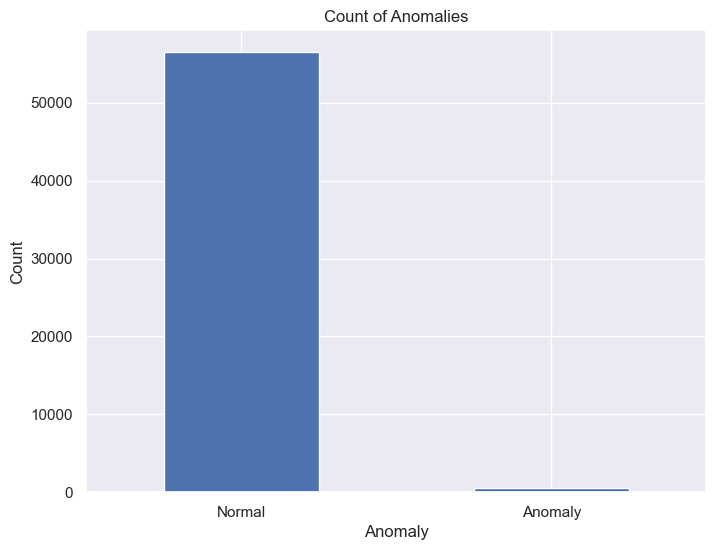

In [58]:
# Plot the count of anomalies
plt.figure(figsize=(8, 6))
anomaly_count.plot(kind='bar')
plt.title('Count of Anomalies')
plt.xlabel('Anomaly')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Normal', 'Anomaly'], rotation=0)
plt.show()

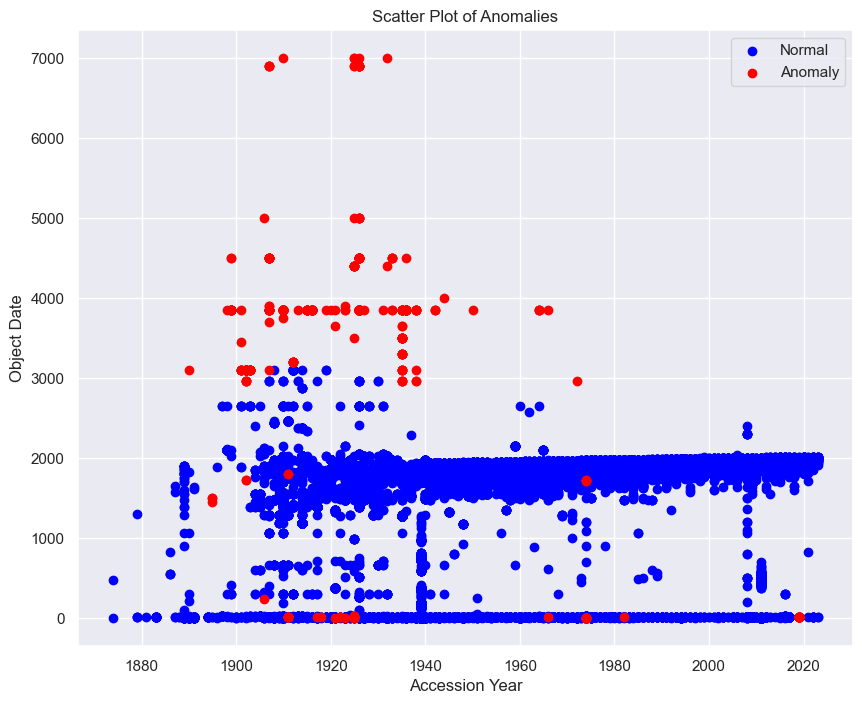

In [59]:
# Plot anomalies in a scatter plot with different colors
plt.figure(figsize=(10, 8))

# Plot normal data points
plt.scatter(cleaned_data[cleaned_data['Anomaly'] == 1]['AccessionYear'],
            cleaned_data[cleaned_data['Anomaly'] == 1]['Object Date'],
            c='blue', label='Normal')

# Plot anomalous data points
plt.scatter(cleaned_data[cleaned_data['Anomaly'] == -1]['AccessionYear'],
            cleaned_data[cleaned_data['Anomaly'] == -1]['Object Date'],
            c='red', label='Anomaly')

plt.title('Scatter Plot of Anomalies')
plt.xlabel('Accession Year')
plt.ylabel('Object Date')
plt.legend()
plt.show()

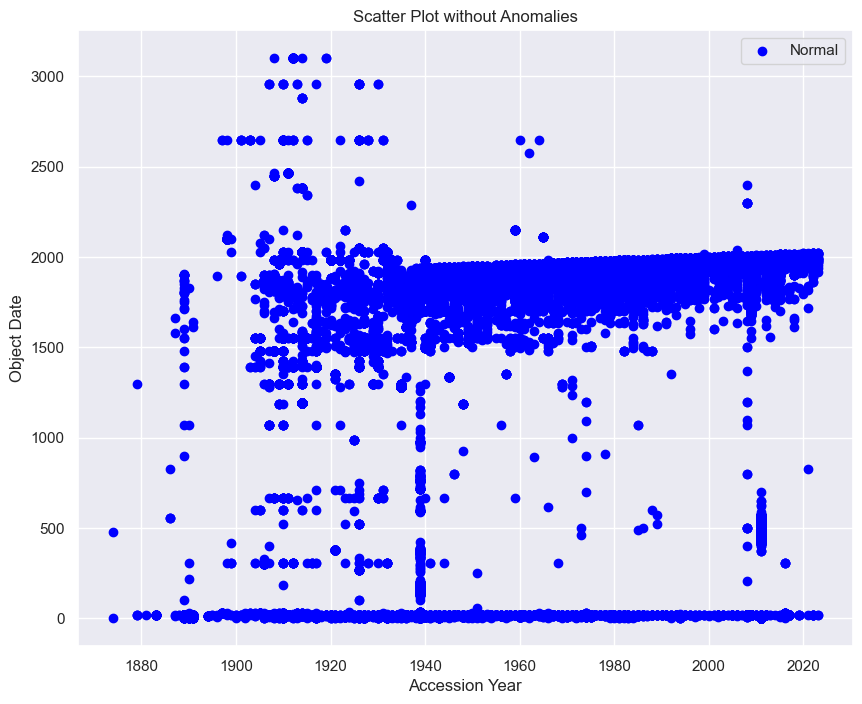

In [60]:
# Remove anomalies from the dataset
cleaned_data_no_anomalies = cleaned_data[cleaned_data['Anomaly'] == 1]

# Plot the new graph without anomalies
plt.figure(figsize=(10, 8))

# Plot normal data points without anomalies
plt.scatter(cleaned_data_no_anomalies['AccessionYear'],
            cleaned_data_no_anomalies['Object Date'],
            c='blue', label='Normal')

plt.title('Scatter Plot without Anomalies')
plt.xlabel('Accession Year')
plt.ylabel('Object Date')
plt.legend()
plt.show()

In [61]:
# Reverse one-hot encoding for the 'Department' column
department_columns = [col for col in cleaned_data_no_anomalies.columns if col.startswith('Department_')]
cleaned_data_no_anomalies['Department'] = cleaned_data_no_anomalies[department_columns].idxmax(axis=1)
cleaned_data_no_anomalies['Department'] = cleaned_data_no_anomalies['Department'].apply(lambda x: x.split('_')[1])

# Drop the one-hot encoded columns
cleaned_data_no_anomalies = cleaned_data_no_anomalies.drop(columns=department_columns)

print(cleaned_data_no_anomalies.head())

       AccessionYear  Object Begin Date  Object End Date  Artist Begin Date  \
1491          1962.0               1722             1790                0.0   
1795          1934.0               1810             1820                0.0   
6894          1941.0               1782             1785             1765.0   
13294         1941.0               1872             1900                0.0   
14906         1997.0               1854             1857             1854.0   

       Artist End Date  Dimensions  Object Date  Anomaly         Department  
1491               0.0         0.0       1725.0        1  The American Wing  
1795               0.0         0.0       1810.0        1  The American Wing  
6894            1830.0         0.0       1785.0        1  The American Wing  
13294              0.0         0.0       1875.0        1  The American Wing  
14906           1857.0         0.0       1854.0        1  The American Wing  


/var/folders/pc/kvcfgc5j72b6l53r97nqwgvh0000gn/T/ipykernel_48769/1391932505.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data_no_anomalies['Department'] = cleaned_data_no_anomalies[department_columns].idxmax(axis=1)
/var/folders/pc/kvcfgc5j72b6l53r97nqwgvh0000gn/T/ipykernel_48769/1391932505.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data_no_anomalies['Department'] = cleaned_data_no_anomalies['Department'].apply(lambda x: x.split('_')[1])


#### This code will:

* Create histograms to visualize the distribution of accession dates and object dates (begin and end) by department.
* Create line graphs to illustrate the accession year distribution by department.
* Create scatter plots to show the relationship between object begin and end dates by department.
* Optionally, visualize additional data such as artist information and object dimensions.

Text(0, 0.5, 'Object Start Dates')

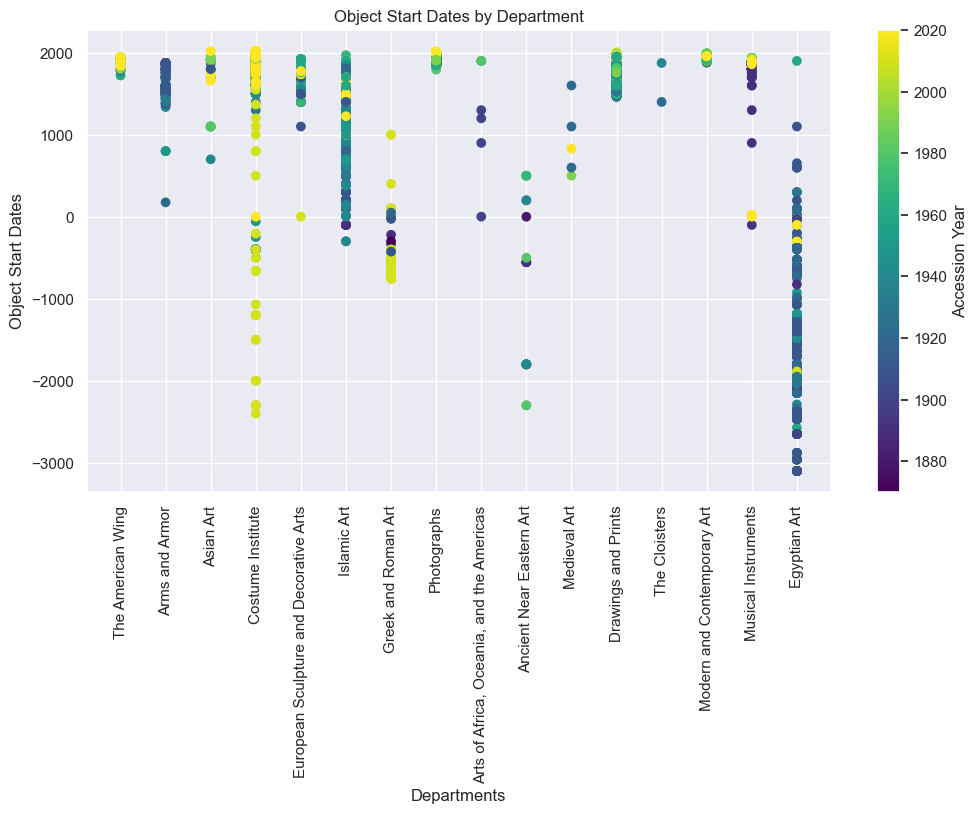

In [62]:
plt.figure(figsize=(12, 6))
plt.scatter(cleaned_data_no_anomalies['Department'],cleaned_data_no_anomalies['Object Begin Date'],
            c=round(cleaned_data_no_anomalies['AccessionYear'],-1), cmap='viridis')
cbar=plt.colorbar()
cbar.set_label('Accession Year')
plt.xticks(rotation=90)
plt.title('Object Start Dates by Department')
plt.xlabel('Departments')
plt.ylabel('Object Start Dates')


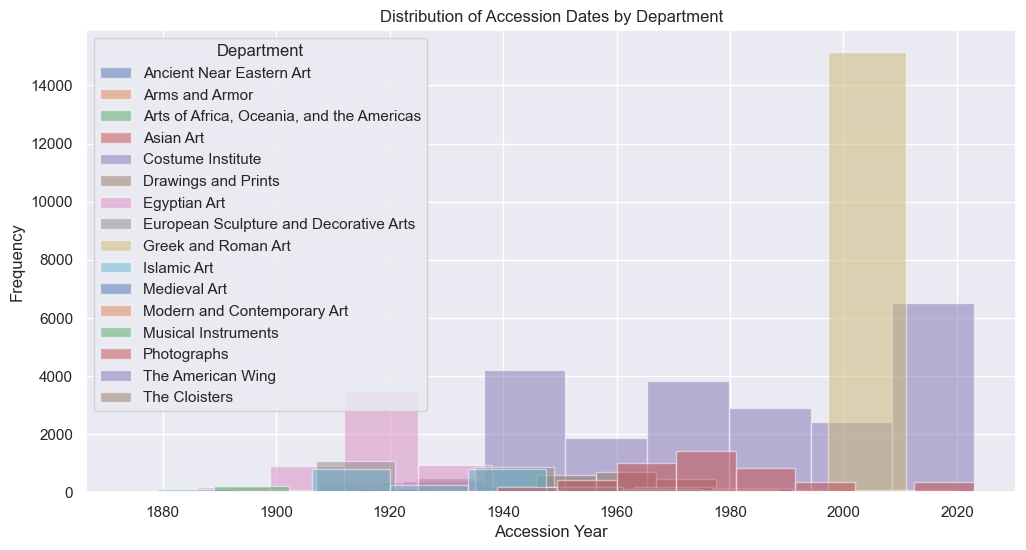

In [63]:
# Convert 'AccessionYear' to numeric, coercing errors to NaN
cleaned_data_no_anomalies.loc[:, 'AccessionYear'] = pd.to_numeric(cleaned_data_no_anomalies['AccessionYear'], errors='coerce')

# Drop rows with NaN values in 'AccessionYear'
cleaned_data_no_anomalies= cleaned_data_no_anomalies.dropna(subset=['AccessionYear'])

# Plot the distribution of accession dates by department
plt.figure(figsize=(12, 6))
cleaned_data_no_anomalies.groupby('Department')['AccessionYear'].plot(kind='hist', alpha=0.5, legend=True)
plt.title('Distribution of Accession Dates by Department')
plt.xlabel('Accession Year')
plt.ylabel('Frequency')
plt.legend(title='Department')
plt.show()

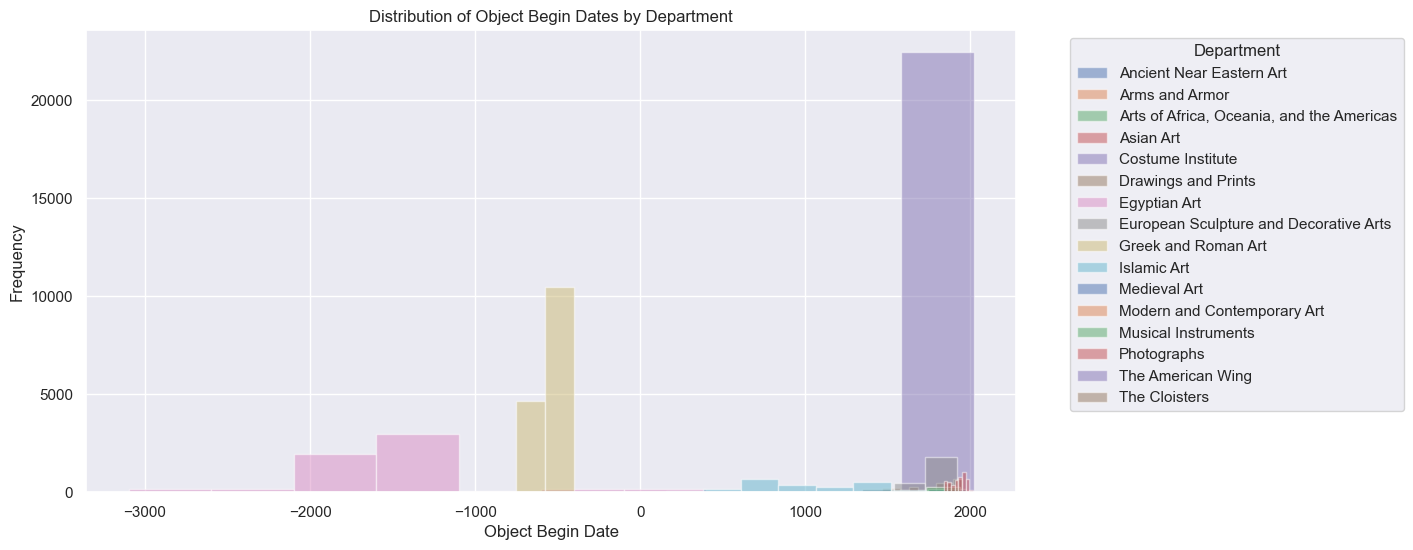

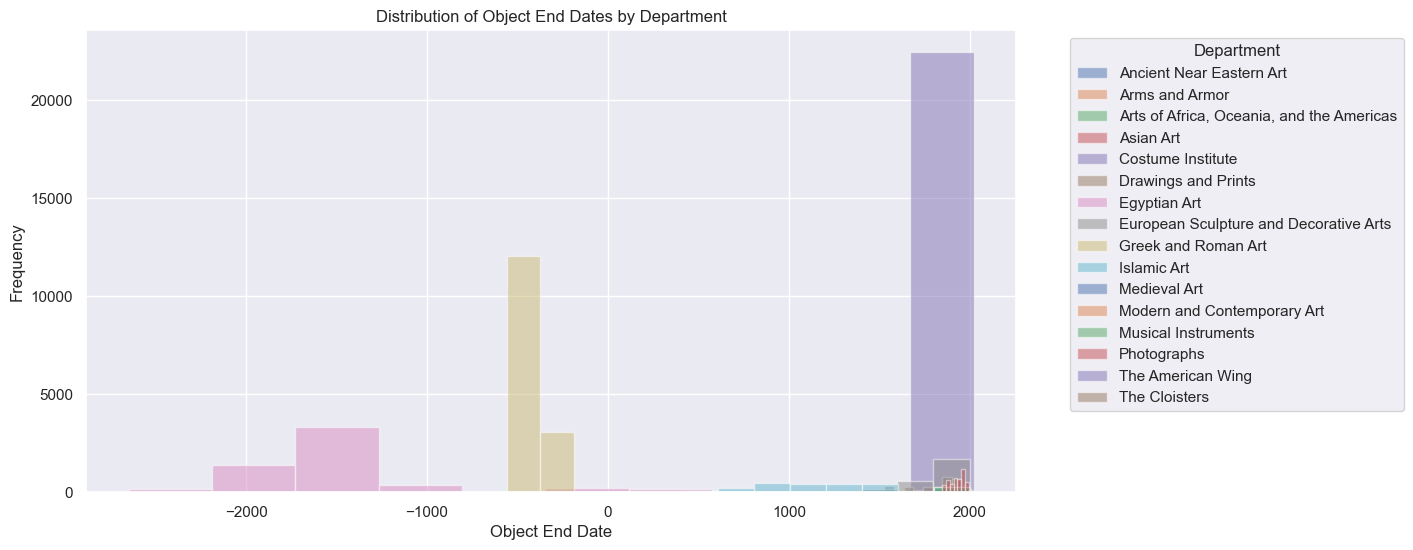

In [64]:
# Plot the distribution of object dates by department
plt.figure(figsize=(12, 6))
cleaned_data_no_anomalies.groupby('Department')['Object Begin Date'].plot(kind='hist', alpha=0.5, legend=True)
plt.title('Distribution of Object Begin Dates by Department')
plt.xlabel('Object Begin Date')
plt.ylabel('Frequency')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

plt.figure(figsize=(12, 6))
cleaned_data_no_anomalies.groupby('Department')['Object End Date'].plot(kind='hist', alpha=0.5, legend=True)
plt.title('Distribution of Object End Dates by Department')
plt.xlabel('Object End Date')
plt.ylabel('Frequency')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

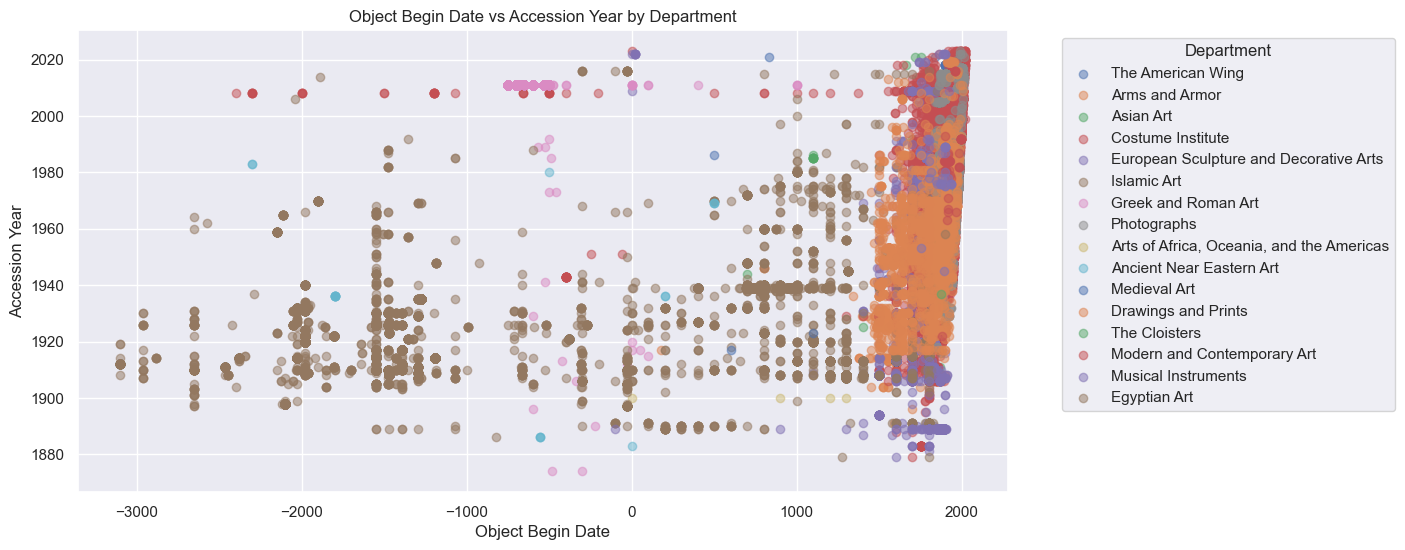

In [65]:
# Scatter plot for Object Begin Date vs Object End Date by Department

plt.figure(figsize=(12, 6))
for department in cleaned_data_no_anomalies['Department'].unique():
    dept_data = cleaned_data_no_anomalies[cleaned_data_no_anomalies['Department'] == department]
    plt.scatter(dept_data['Object Begin Date'], dept_data['AccessionYear'], label=department, alpha=0.5)
plt.title('Object Begin Date vs Accession Year by Department')
plt.xlabel('Object Begin Date')
plt.ylabel('Accession Year')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [66]:
#List of Departments
print(cleaned_data_no_anomalies['Department'].unique().tolist())

['The American Wing', 'Arms and Armor', 'Asian Art', 'Costume Institute', 'European Sculpture and Decorative Arts', 'Islamic Art', 'Greek and Roman Art', 'Photographs', 'Arts of Africa, Oceania, and the Americas', 'Ancient Near Eastern Art', 'Medieval Art', 'Drawings and Prints', 'The Cloisters', 'Modern and Contemporary Art', 'Musical Instruments', 'Egyptian Art']


In [67]:
#Datasets By Department
american_wing=cleaned_data_no_anomalies[cleaned_data_no_anomalies['Department']=='The American Wing']
euro_sculpture=cleaned_data_no_anomalies[cleaned_data_no_anomalies['Department']=='European Sculpture and Decorative Arts']
modern_art=cleaned_data_no_anomalies[cleaned_data_no_anomalies['Department']=='Modern and Contemporary Art']
arms_armor=cleaned_data_no_anomalies[cleaned_data_no_anomalies['Department']=='Arms and Armor']
medieval_art=cleaned_data_no_anomalies[cleaned_data_no_anomalies['Department']=='Medieval Art']
asian_art=cleaned_data_no_anomalies[cleaned_data_no_anomalies['Department']=='Asian Art']
islamic_art=cleaned_data_no_anomalies[cleaned_data_no_anomalies['Department']=='Islamic Art']
costume_inst=cleaned_data_no_anomalies[cleaned_data_no_anomalies['Department']=='Costume Institute']
africa_oceania_americas=cleaned_data_no_anomalies[cleaned_data_no_anomalies['Department']=='Arts of Africa, Oceania, and the Americas']
drawings_prints=cleaned_data_no_anomalies[cleaned_data_no_anomalies['Department']=='Drawings and Prints']
greek_roman=cleaned_data_no_anomalies[cleaned_data_no_anomalies['Department']=='Greek and Roman Art']
photographs=cleaned_data_no_anomalies[cleaned_data_no_anomalies['Department']=='Photographs']
ancient_near_east=cleaned_data_no_anomalies[cleaned_data_no_anomalies['Department']=='Ancient Near Eastern Art']
egyptian_art=cleaned_data_no_anomalies[cleaned_data_no_anomalies['Department']=='Egyptian Art']
euro_paintings=cleaned_data_no_anomalies[cleaned_data_no_anomalies['Department']=='European Paintings']
robert_lehman=cleaned_data_no_anomalies[cleaned_data_no_anomalies['Department']=='Robert Lehman Collection']
cloisters=cleaned_data_no_anomalies[cleaned_data_no_anomalies['Department']=='The Cloisters']
instruments=cleaned_data_no_anomalies[cleaned_data_no_anomalies['Department']=='Musical Instruments']
librariers=cleaned_data_no_anomalies[cleaned_data_no_anomalies['Department']=='The Libraries']

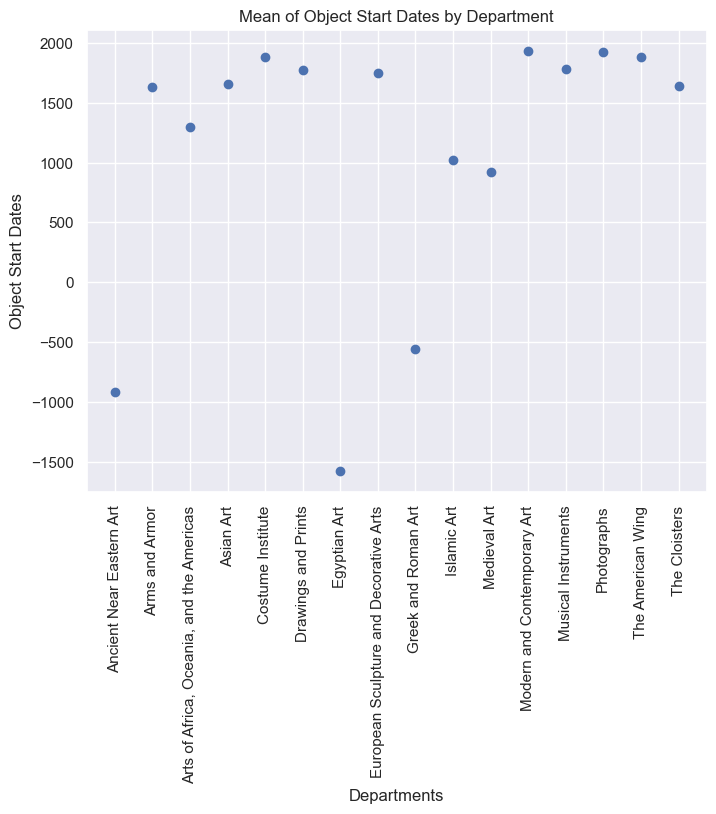

In [68]:
#Plot of Means of Object Start Date By Department
plt.figure(figsize=(8, 6))
start_means=cleaned_data_no_anomalies.groupby('Department')['Object Begin Date'].mean()
plt.scatter(start_means.index, start_means.values)
plt.title('Mean of Object Start Dates by Department')
plt.xlabel('Departments')
plt.ylabel('Object Start Dates')
plt.xticks(rotation=90)
plt.show()

/var/folders/pc/kvcfgc5j72b6l53r97nqwgvh0000gn/T/ipykernel_48769/4194972178.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cleaned_data_no_anomalies['Department'],y=cleaned_data_no_anomalies['Object Begin Date'],palette=sns.color_palette("bright"))
/var/folders/pc/kvcfgc5j72b6l53r97nqwgvh0000gn/T/ipykernel_48769/4194972178.py:2: UserWarning: 
The palette list has fewer values (10) than needed (16) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x=cleaned_data_no_anomalies['Department'],y=cleaned_data_no_anomalies['Object Begin Date'],palette=sns.color_palette("bright"))


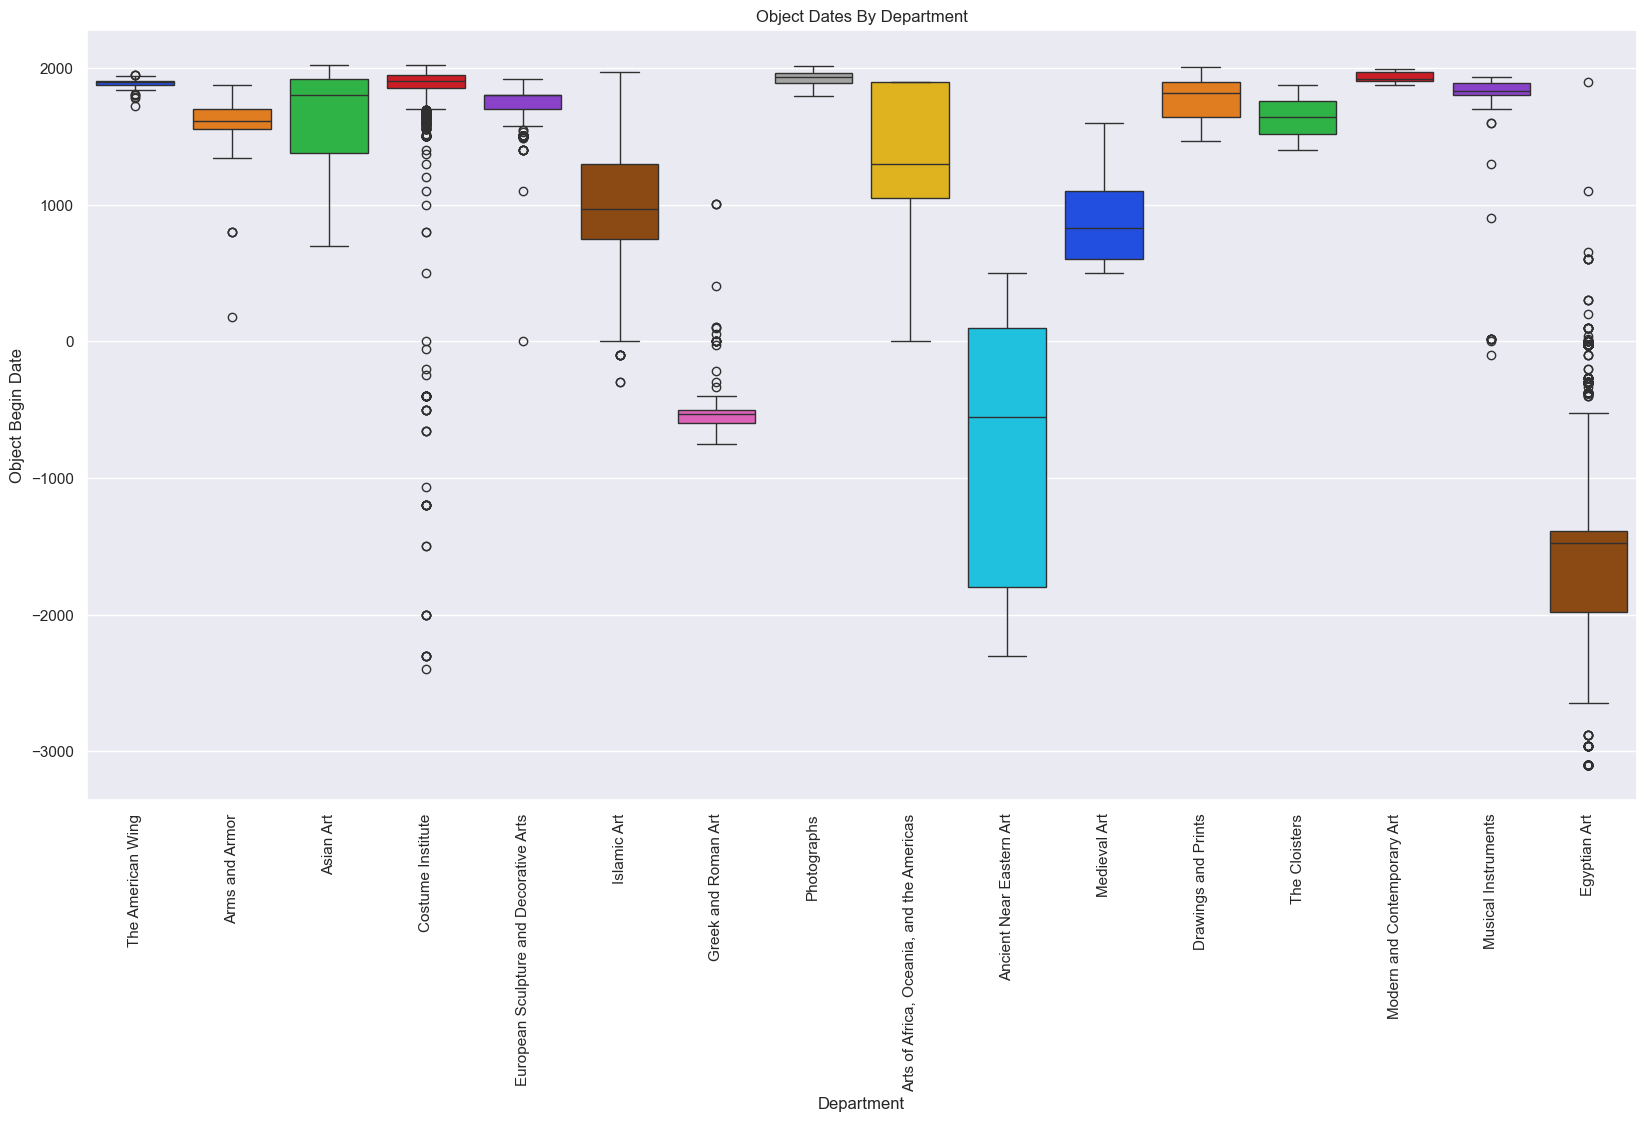

In [69]:
import seaborn as sns
sns.boxplot(x=cleaned_data_no_anomalies['Department'],y=cleaned_data_no_anomalies['Object Begin Date'],palette=sns.color_palette("bright"))
sns.set_theme(rc={'figure.figsize':(20,10)})
plt.xticks(rotation=90)
plt.title("Object Dates By Department")
plt.show()

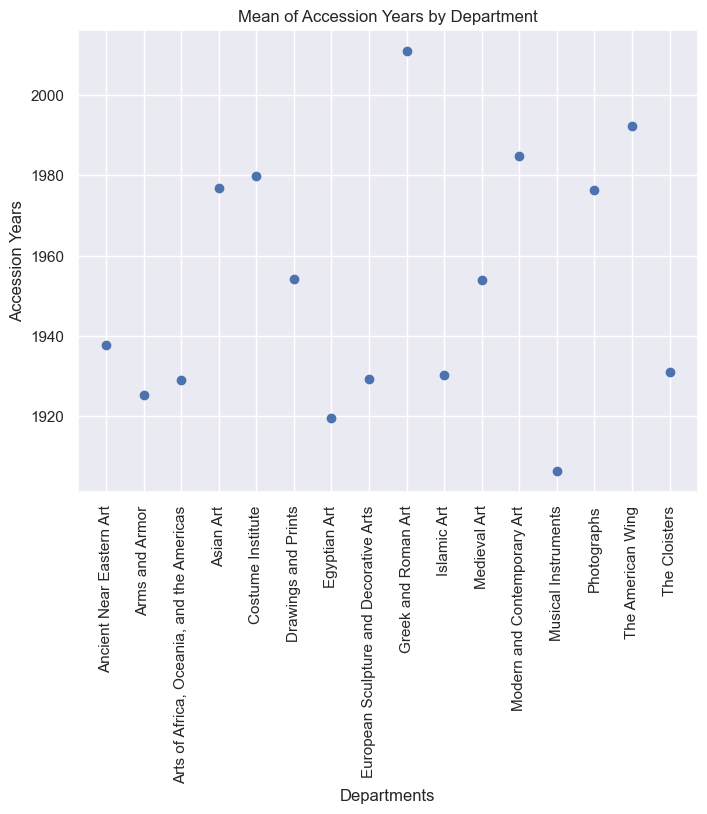

In [70]:
#Plot of Means of Accession Date By Department
acces_means=cleaned_data_no_anomalies.groupby('Department')['AccessionYear'].mean()
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(acces_means.index, acces_means.values)
plt.title('Mean of Accession Years by Department')
plt.xlabel('Departments')
plt.ylabel('Accession Years')
plt.xticks(rotation=90)
plt.show()

/var/folders/pc/kvcfgc5j72b6l53r97nqwgvh0000gn/T/ipykernel_48769/2497643323.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cleaned_data_no_anomalies['Department'],y=cleaned_data_no_anomalies['AccessionYear'],palette=sns.color_palette("bright"))
/var/folders/pc/kvcfgc5j72b6l53r97nqwgvh0000gn/T/ipykernel_48769/2497643323.py:2: UserWarning: 
The palette list has fewer values (10) than needed (16) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x=cleaned_data_no_anomalies['Department'],y=cleaned_data_no_anomalies['AccessionYear'],palette=sns.color_palette("bright"))


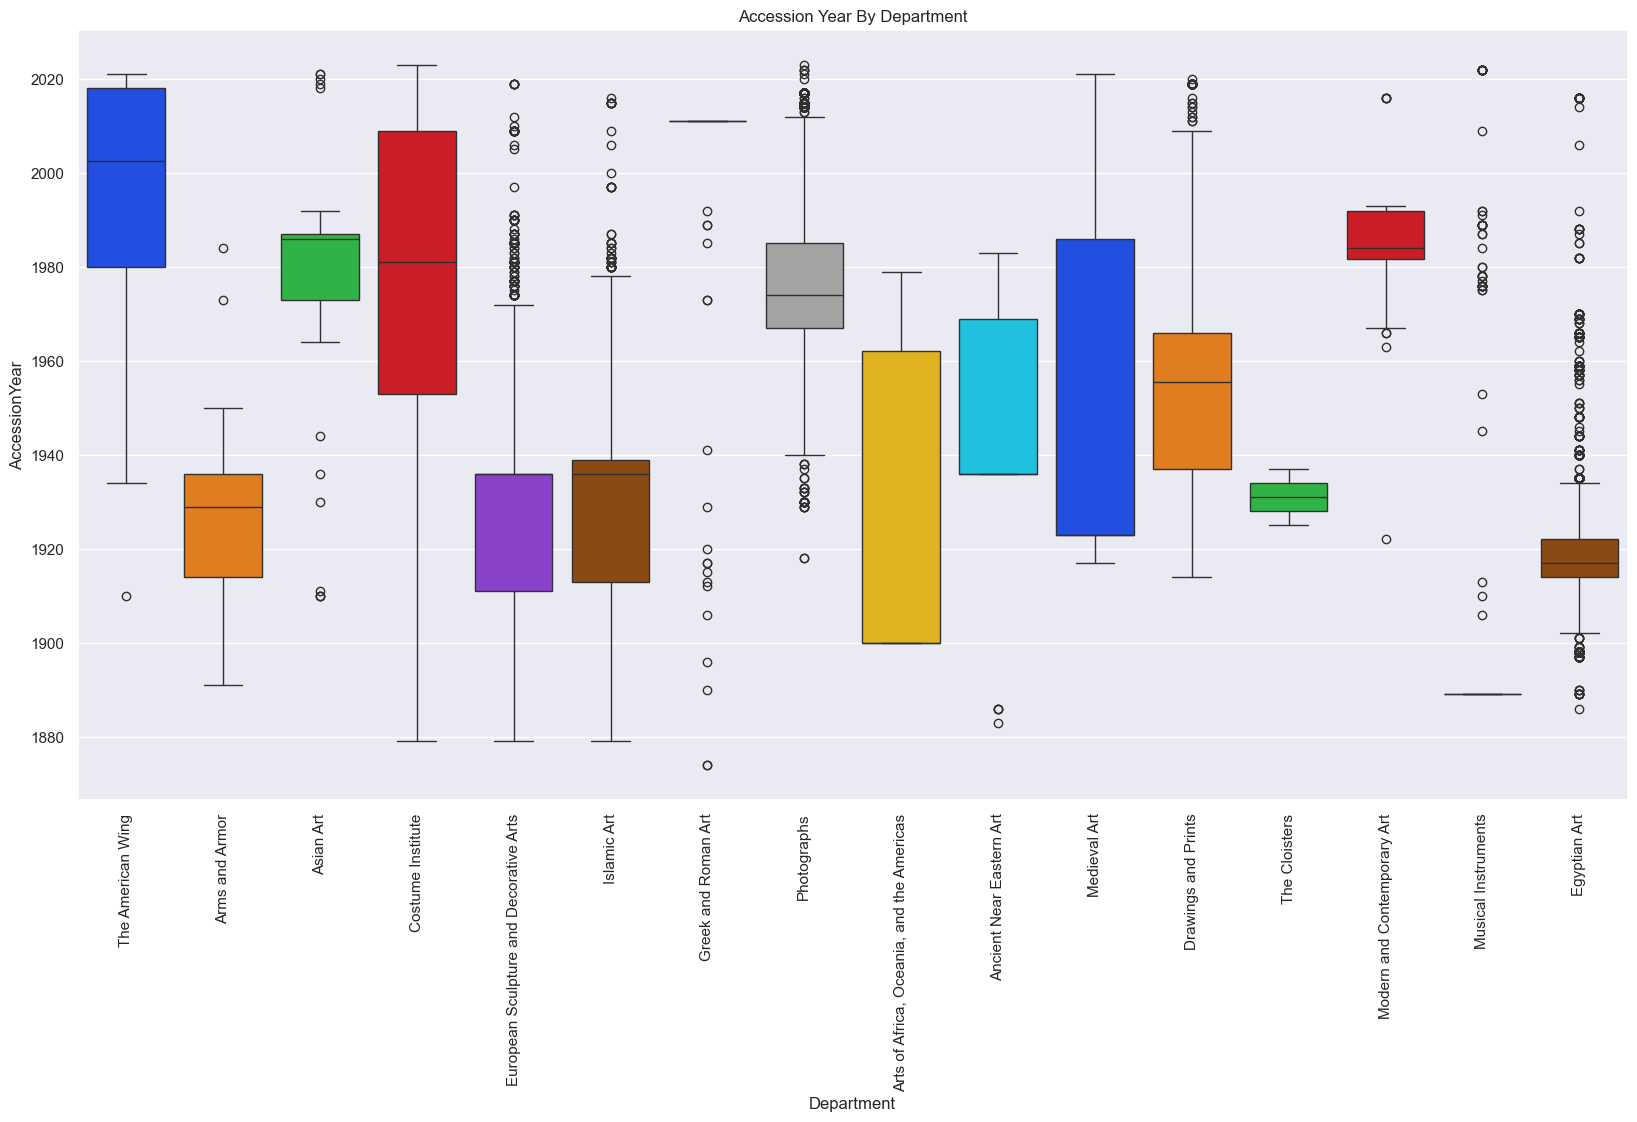

In [71]:
import seaborn as sns
sns.boxplot(x=cleaned_data_no_anomalies['Department'],y=cleaned_data_no_anomalies['AccessionYear'],palette=sns.color_palette("bright"))
sns.set_theme(rc={'figure.figsize':(20,10)})
plt.xticks(rotation=90)
plt.title("Accession Year By Department")
plt.show()

In [72]:
# By year, which department is most represented
mcv_osd = cleaned_data_no_anomalies.groupby('Object Begin Date')['Department'].agg(lambda x: x.value_counts().index[0]).rename('Most Common Value')
print(mcv_osd)

Object Begin Date
-3100         Egyptian Art
-2960         Egyptian Art
-2880         Egyptian Art
-2650         Egyptian Art
-2649         Egyptian Art
               ...        
 2018    Costume Institute
 2019    Costume Institute
 2020    Costume Institute
 2021    Costume Institute
 2022    Costume Institute
Name: Most Common Value, Length: 756, dtype: object


In [73]:
# What did the Met focus on each year
mcv_acc = cleaned_data_no_anomalies.groupby('AccessionYear')['Department'].agg(lambda x: x.value_counts().index[0]).rename('Most Common Value')
print(mcv_acc)


AccessionYear
1874.0                       Greek and Roman Art
1879.0                               Islamic Art
1881.0    European Sculpture and Decorative Arts
1883.0                         Costume Institute
1886.0                  Ancient Near Eastern Art
                           ...                  
2019.0                       Drawings and Prints
2020.0                         Costume Institute
2021.0                         Costume Institute
2022.0                         Costume Institute
2023.0                         Costume Institute
Name: Most Common Value, Length: 140, dtype: object


In [74]:
#Modeling Imports
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.utils.multiclass import unique_labels
from sklearn import tree
import numpy as np
import seaborn as sns

In [75]:
print(cleaned_data_no_anomalies.columns)
X = cleaned_data_no_anomalies.drop(['Department','Dimensions','Artist Begin Date','Artist End Date'],axis=1)
cleaned_data_no_anomalies = cleaned_data_no_anomalies.sort_values(by='Department')
y = cleaned_data_no_anomalies.Department
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Index(['AccessionYear', 'Object Begin Date', 'Object End Date',
       'Artist Begin Date', 'Artist End Date', 'Dimensions', 'Object Date',
       'Anomaly', 'Department'],
      dtype='object')


In [76]:
#Decision Tree
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)


In [77]:
# Decision Tree Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9167748789989375


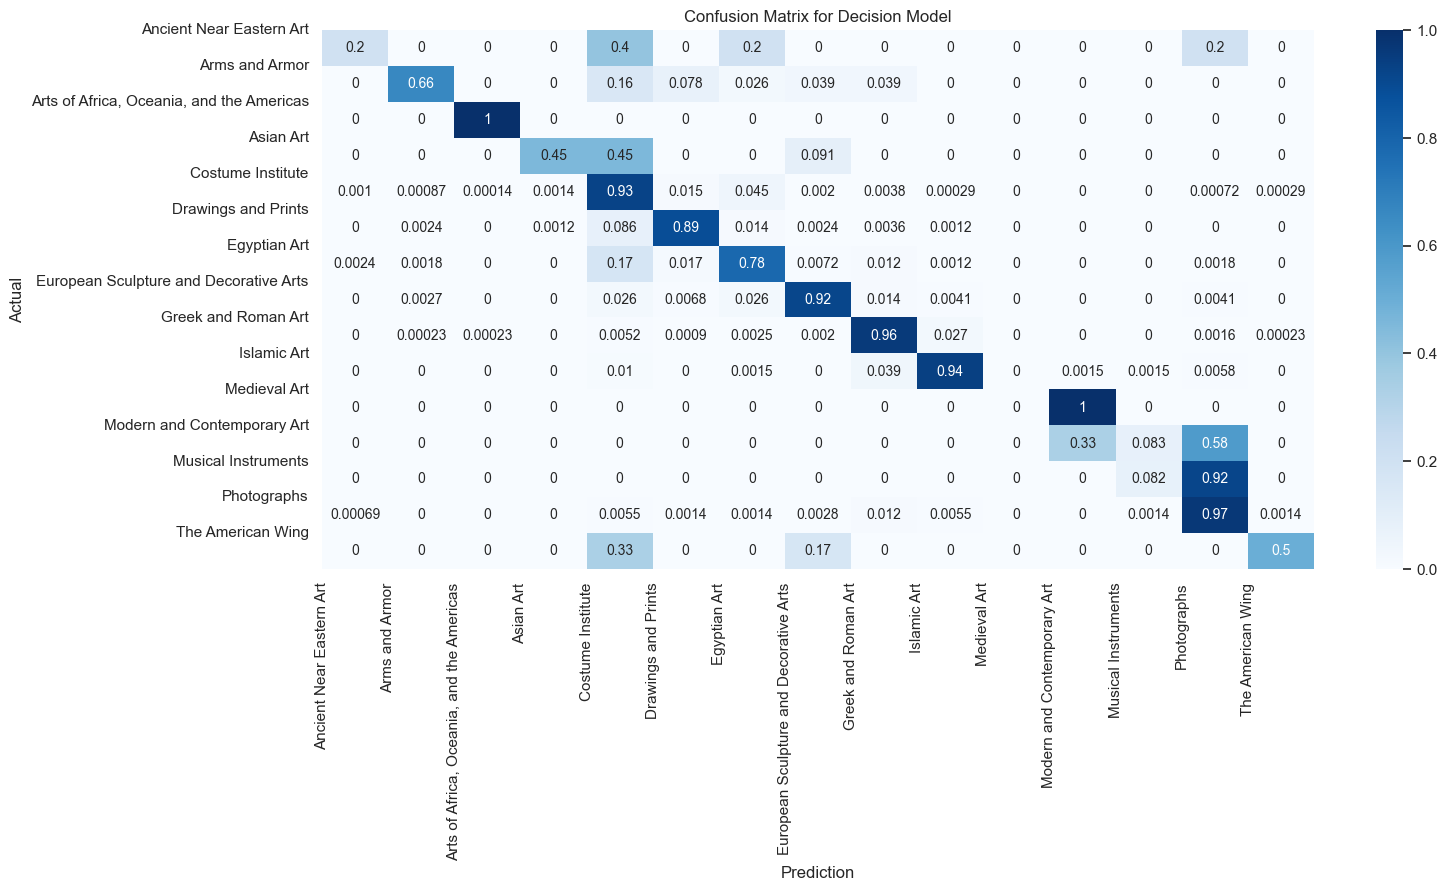

In [78]:
labels = unique_labels(y_test, y_pred)
matrix=confusion_matrix(y_test, y_pred,labels=labels)
matrix = matrix.astype('float')/matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Blues)


tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=90)
plt.yticks(tick_marks, labels, rotation=0)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Model')
plt.show()

In [79]:
class_report = classification_report(y_test, y_pred,zero_division=0)
print("Classification Report:")
print(class_report)

Classification Report:
                                           precision    recall  f1-score   support

                 Ancient Near Eastern Art       0.08      0.20      0.11         5
                           Arms and Armor       0.78      0.66      0.72        77
Arts of Africa, Oceania, and the Americas       0.33      1.00      0.50         1
                                Asian Art       0.31      0.45      0.37        11
                        Costume Institute       0.94      0.93      0.93      6932
                      Drawings and Prints       0.83      0.89      0.86       839
                             Egyptian Art       0.78      0.78      0.78      1659
   European Sculpture and Decorative Arts       0.94      0.92      0.93       732
                      Greek and Roman Art       0.98      0.96      0.97      4437
                              Islamic Art       0.83      0.94      0.88       688
                             Medieval Art       0.00      0.00 

In [80]:
#Random Forest
rf = RandomForestClassifier()
rf = rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [81]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9256876401841577


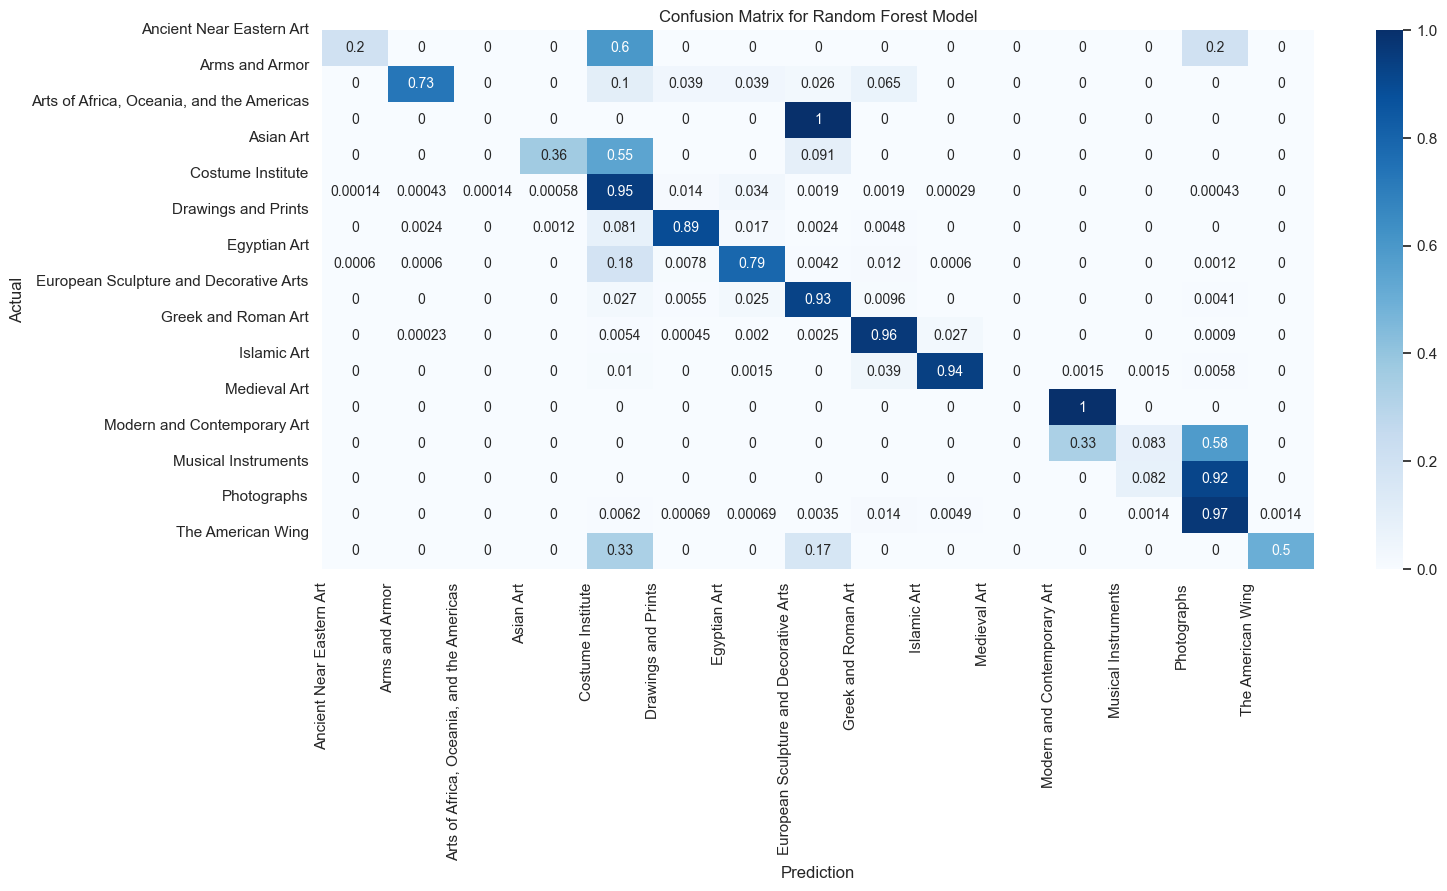

In [82]:
labels = unique_labels(y_test, y_pred)
matrix=confusion_matrix(y_test, y_pred,labels=labels)
matrix = matrix.astype('float')/matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Blues)

tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=90)
plt.yticks(tick_marks, labels, rotation=0)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [83]:
class_report = classification_report(y_test, y_pred,zero_division=0)
print("Classification Report:")
print(class_report)

Classification Report:
                                           precision    recall  f1-score   support

                 Ancient Near Eastern Art       0.33      0.20      0.25         5
                           Arms and Armor       0.89      0.73      0.80        77
Arts of Africa, Oceania, and the Americas       0.00      0.00      0.00         1
                                Asian Art       0.44      0.36      0.40        11
                        Costume Institute       0.94      0.95      0.94      6932
                      Drawings and Prints       0.86      0.89      0.88       839
                             Egyptian Art       0.82      0.79      0.81      1659
   European Sculpture and Decorative Arts       0.94      0.93      0.93       732
                      Greek and Roman Art       0.98      0.96      0.97      4437
                              Islamic Art       0.83      0.94      0.88       688
                             Medieval Art       0.00      0.00 